In [1]:
from datetime import datetime as dt
import uuid 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
# sessions containing chat

c = pickle.load( open( "./chat_sessions.p", "rb" ) )

In [3]:
len(c.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


15874

In [4]:
# set of unique users who have made chat actions

chat_users = set(c.user)

In [5]:
len(chat_users)

8590

In [2]:
# all sessions

df = pickle.load( open( "./cleaned_dataset.p", "rb" ) )

In [7]:
# all users

total_users = set(df.user) 

In [8]:
len(total_users)

35889

In [11]:
# number of chat users / total number of users

len(chat_users) / len(total_users)

0.23934910418233998

In [12]:
# all sessions of users who have made chat actions

chatuser_sessions = df.groupby('UUID').filter(lambda g: (g.user.isin(chat_users)).any())

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
len(chatuser_sessions.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


78348

In [14]:
# sessions from chat users that does not contain chat

n = chatuser_sessions.groupby('UUID').filter(lambda g: (g.action_cleaned != 'start_chat').all())

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
len(n.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


62474

In [16]:
len(n.groupby('UUID')) + len(c.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


78348

In [17]:
# ratio of chat sessions per all sessions of users who have made chat actions

len(c.groupby('UUID')) / len(chatuser_sessions.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


0.20260887323224588

In [18]:
# ratio of non-chat sessions per all sessions of users who have made chat actions

len(n.groupby('UUID')) / len(chatuser_sessions.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


0.7973911267677541

In [37]:
# number of sessions per user in total dataset

num_sessions_user = df.groupby('user')['UUID'].nunique()

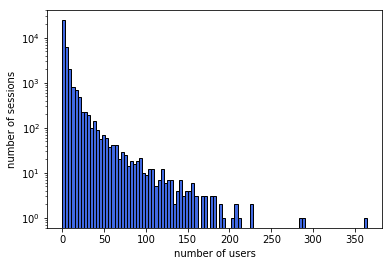

In [41]:
bins = np.linspace(0,num_sessions_user.values.max(),100)
n, bins, pathces = plt.hist(x=num_sessions_user.values,bins=bins,log=True,color='royalblue',edgecolor='black')
#plt.xticks(bins)
plt.xlabel('number of users')
plt.ylabel('number of sessions')

plt.savefig("img/num_sessions_per_user.pdf", bbox_inches='tight')
plt.show()

In [34]:
# number of sessions per user for users that have made a chat action

num_sessions_chat_user = chatuser_sessions.groupby('user')['UUID'].nunique()

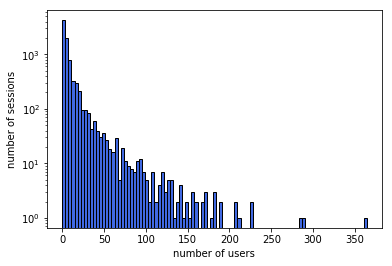

In [42]:
bins = np.linspace(0,num_sessions_chat_user.values.max(),100)
n, bins, pathces = plt.hist(x=num_sessions_chat_user.values,bins=bins,log=True,color='royalblue',edgecolor='black')
#plt.xticks(bins)
plt.xlabel('number of users')
plt.ylabel('number of sessions')

plt.savefig("img/num_sessions_per_chat_user.pdf", bbox_inches='tight')
plt.show()

In [3]:
df.head(10)

Unnamed: 0  visit_id  sequence  \
UUID                                                                           
00000fc9-f617-4850-b017-6e5e5cbaa0e8 179883       184378  23654356         1   
                                     179882       184377  23654356         2   
                                     179881       184376  23654356         3   
                                     179880       184375  23654356         4   
                                     179879       184374  23654356         5   
00002b21-60be-4d71-a889-f0b0cb7a3e8e 1888950     1932162  26807163         1   
                                     1888951     1932163  26807163         2   
                                     1888952     1932164  26807163         3   
                                     1888953     1932165  26807163         4   
                                     1888954     1932166  26807163         5   

                                                      start_time  \
UUID                                                               
00000fc9-f617-4850-b017-6e5e5cbaa0e8 179883  2018-04-26 15:14:26   
                                     179882  2018-04-26 15:14:43   
                                     179881  2018-04-26 15:14:47   
                                     179880  2018-04-26 15:14:48   
                                     179879  2018-04-26 15:15:06   
00002b21-60be-4d71-a889-f0b0cb7a3e8e 1888950 2018-06-29 22:49:06   
                                     1888951 2018-06-29 22:49:07   
                                     1888952 2018-06-29 22:49:37   
                                     1888953 2018-06-29 22:50:17   
                                     1888954 2018-06-29 22:50:47   

                                              event_duration  \
UUID                                                           
00000fc9-f617-4850-b017-6e5e5cbaa0e8 179883         0.000000   
                                     179882        16.816000   
                                     179881         3.665000   
                                     179880         1.699000   
                                     179879        17.427000   
00002b21-60be-4d71-a889-f0b0cb7a3e8e 1888950        0.000000   
                                     1888951        1.089000   
                                     1888952       29.895000   
                                     1888953       40.271999   
                                     1888954       29.950001   

                                                                                            url  \
UUID                                                                                              
00000fc9-f617-4850-b017-6e5e5cbaa0e8 179883   https://www.telenor.no/bedrift/minbedrift/beta/#/   
                                     179882   https://www.telenor.no/bedrift/minbedrift/beta...   
                                     179881   https://www.telenor.no/bedrift/minbedrift/beta...   
                                     179880   https://www.telenor.no/bedrift/minbedrift/beta...   
                                     179879   https://www.telenor.no/bedrift/minbedrift/beta...   
00002b21-60be-4d71-a889-f0b0cb7a3e8e 1888950  https://www.telenor.no/bedrift/minbedrift/beta/#/   
                                     1888951  https://www.telenor.no/bedrift/minbedrift/beta/#/   
                                     1888952  https://www.telenor.no/bedrift/minbedrift/beta/#/   
                                     1888953  https://www.telenor.no/bedrift/minbedrift/beta/#/   
                                     1888954  https://www.telenor.no/bedrift/minbedrift/beta/#/   

                                                                                         action  \
UUID                                                                                              
00000fc9-f617-4850-b017-6e5e5cbaa0e8 179883                                              _load_   
             